<h2>Hello Everyone!</h2>

<h2>This is my project on the Analysis of the Suicides in India between (2001-2012)</h2>

In [66]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [45]:
# reading the dataset.
df=pd.read_csv(r"C:\Users\Asus\Desktop\Suicides in India 2001-2012.csv")
df

,State,Year,Type_code,Type,Gender,Age_group,Total
0,A & N Islands,2001,Causes,Illness (Aids/STD),Female,0-14,0
1,A & N Islands,2001,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2,A & N Islands,2001,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
3,A & N Islands,2001,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0
4,A & N Islands,2001,Causes,Dowry Dispute,Female,0-14,0
...,...,...,...,...,...,...,...
237514,West Bengal,2012,Social_Status,Seperated,Male,0-100+,149
237515,West Bengal,2012,Social_Status,Widowed/Widower,Male,0-100+,233
237516,West Bengal,2012,Social_Status,Married,Male,0-100+,5451
237517,West Bengal,2012,Social_Status,Divorcee,Male,0-100+,189


<h4>Viewing the datatype of the indivdual columns:</h4>

In [46]:
df.dtypes

State        object
Year          int64
Type_code    object
Type         object
Gender       object
Age_group    object
Total         int64
dtype: object

<h4>To view some basic statistical details like percentile, mean, std etc. of a data frame or a series of numeric values:</h4>

In [47]:
df.describe()

,Year,Total
count,237519.000000,237519.000000
mean,2006.500448,55.034477
std,3.452240,792.749038
min,2001.000000,0.000000
25%,2004.000000,0.000000
50%,2007.000000,0.000000
75%,2010.000000,6.000000
max,2012.000000,63343.000000


<h4>To check if there are any null values in the columns of our dataset:</h4>

In [48]:
df.isnull().sum()

State        0
Year         0
Type_code    0
Type         0
Gender       0
Age_group    0
Total        0
dtype: int64

<h4>To show the shape of the dataset.</h4>

In [49]:
df.shape

(237519, 7)

<h4>To view all the columns in the dataset:</h4>

In [50]:
df.columns

Index(['State', 'Year', 'Type_code', 'Type', 'Gender', 'Age_group', 'Total'], dtype='object')

<h4>To count the number of values present under each column:</h4>

In [51]:
print(df['Type_code'].value_counts())
print(df['Type'].value_counts())
print(df['Gender'].value_counts())
print(df['Age_group'].value_counts())
print(df['State'].value_counts())

Causes                  109200
Means_adopted            67200
Professional_Profile     49263
Education_Status          7296
Social_Status             4560
Name: Type_code, dtype: int64
Others (Please Specify)                           7263
Farming/Agriculture Activity                      4200
By Consuming Other Poison                         4200
Suspected/Illicit Relation                        4200
By Jumping from (Building)                        4200
                                                  ... 
Diploma                                            912
Seperated                                          912
Not having Children (Barrenness/Impotency          350
By Other means                                     350
Bankruptcy or Sudden change in Economic Status     350
Name: Type, Length: 69, dtype: int64
Male      118879
Female    118640
Name: Gender, dtype: int64
15-29     45223
30-44     45193
45-59     45146
60+       45074
0-14      45027
0-100+    11856
Name: Age_group,

<h4>To sort the dataset for any year:</h4>

In [52]:
year_2006 = df[df['Year'] == 2006]
year_2006.head(10)

,State,Year,Type_code,Type,Gender,Age_group,Total
2793,A & N Islands,2006,Causes,Failure in Examination,Female,0-14,0
2794,A & N Islands,2006,Causes,Causes Not known,Female,0-14,0
2795,A & N Islands,2006,Causes,Bankruptcy or Sudden change in Economic,Female,0-14,0
2796,A & N Islands,2006,Causes,Illegitimate Pregnancy,Female,0-14,0
2797,A & N Islands,2006,Causes,Unemployment,Female,0-14,0
2798,A & N Islands,2006,Causes,Divorce,Female,0-14,0
2799,A & N Islands,2006,Causes,Cancer,Female,0-14,0
2800,A & N Islands,2006,Causes,Paralysis,Female,0-14,0
2801,A & N Islands,2006,Causes,Cancellation/Non-Settlement of Marriage,Female,0-14,0
2802,A & N Islands,2006,Causes,Physical Abuse (Rape/Incest Etc.),Female,0-14,0


<h3>Which year has the highest number of suicide cases?</h3>

Total number of cases from 2001-12: 
 Year
2001     976464
2002     993648
2003     997622
2004    1023137
2005    1025201
2006    1062991
2007    1103667
2008    1125082
2009    1144033
2010    1211322
2011    1219499
2012    1189068
Name: Total, dtype: int64


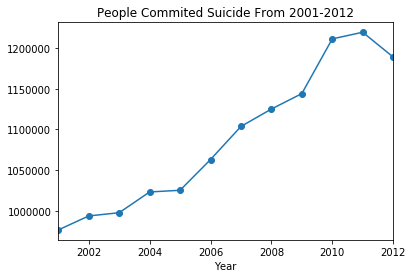

In [53]:
print("Total number of cases from 2001-12: \n",df.groupby("Year")["Total"].sum())
df.groupby("Year")["Total"].sum().plot(kind="line",marker="o",title="People Commited Suicide From 2001-2012")

<h4>Year 2011 has the highest number of suicide cases which are 1219499.<br> Year 2001 has the lowest number of suicide cases which are 976464.</h4>

<h2>Which state has the highest number of suicide cases?</h2>

In [54]:
statewise_data = df.groupby('State')['Total'].sum().sort_values(ascending=False)
statewise_data.drop(index = ['Total (All India)', 'Total (States)', 'Total (Uts)'], inplace=True)
statewise_data = statewise_data.reset_index()
statewise_data

,State,Total
0,Maharashtra,901945
1,West Bengal,849936
2,Tamil Nadu,818691
3,Andhra Pradesh,814059
4,Karnataka,734825
5,Kerala,538946
6,Madhya Pradesh,451535
7,Gujarat,330858
8,Chhattisgarh,302354
9,Odisha,267234


<h4>Maharashtra has the highest number of suicide cases (901945) between 2001-2012.</h4>

<h2>Graphical represntation of the total number of suicide cases in various states</h2>

Text(0.5, 1.0, 'Suicides in various States')

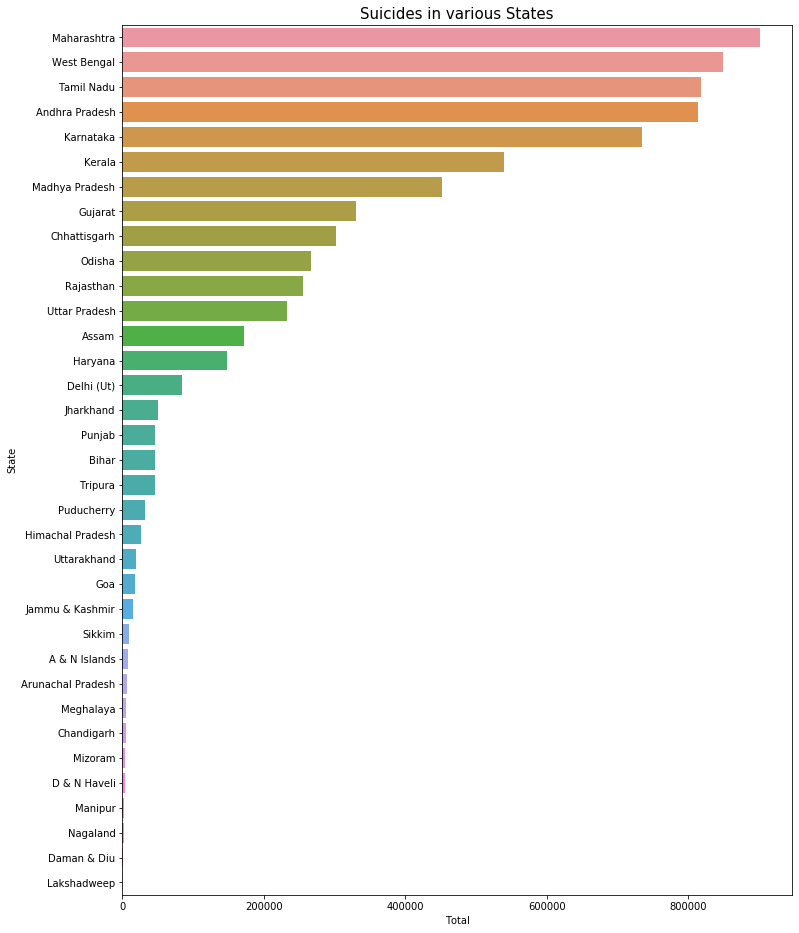

In [55]:
statewise_data = df.groupby('State')['Total'].sum().sort_values(ascending=False)
statewise_data.drop(index = ['Total (All India)', 'Total (States)', 'Total (Uts)'], inplace=True)
statewise_data = statewise_data.reset_index()
plt.figure(figsize=(12,16))
sns.barplot(y=statewise_data['State'], x=statewise_data['Total'])
plt.title('Suicides in various States', fontsize=15)

<h2>The Top 3 States per year (2001-2012)</h2> 

In [56]:
years = [i for i in range(2001,2013)]
for year in years:
    year_data = df[df['Year']== year]
    top_3 = year_data.groupby("State")['Total'].sum().sort_values(ascending=False)
    top_3.drop(index = ['Total (All India)', 'Total (States)', 'Total (Uts)'], inplace=True)
    print(year, top_3[:3], sep='\n')

2001
State
Maharashtra    73090
West Bengal    68450
Karnataka      59405
Name: Total, dtype: int64
2002
State
Maharashtra    72645
West Bengal    65035
Karnataka      61350
Name: Total, dtype: int64
2003
State
Maharashtra    73800
West Bengal    66400
Karnataka      61805
Name: Total, dtype: int64
2004
State
Maharashtra       73645
Andhra Pradesh    67630
West Bengal       67035
Name: Total, dtype: int64
2005
State
West Bengal       75075
Maharashtra       72130
Andhra Pradesh    67210
Name: Total, dtype: int64
2006
State
West Bengal       78625
Maharashtra       77470
Andhra Pradesh    66380
Name: Total, dtype: int64
2007
State
Maharashtra       75920
Andhra Pradesh    74410
West Bengal       74300
Name: Total, dtype: int64
2008
State
West Bengal    74260
Tamil Nadu     72125
Maharashtra    71870
Name: Total, dtype: int64
2009
State
West Bengal       73240
Andhra Pradesh    72500
Tamil Nadu        71832
Name: Total, dtype: int64
2010
State
Tamil Nadu     82805
West Bengal    80185
Ma

<h3>Making a new dataframe by dropping the attribute 'Type_code'</h3>

In [57]:
causes_df = df[df['Type_code'] == 'Causes'].drop(['Type_code'], axis=1)
causes_df.tail()

,State,Year,Type,Gender,Age_group,Total
237218,West Bengal,2012,Drug Abuse/Addiction,Male,60+,0
237219,West Bengal,2012,Not having Children(Barrenness/Impotency,Male,60+,0
237220,West Bengal,2012,Poverty,Male,60+,0
237221,West Bengal,2012,Family Problems,Male,60+,0
237222,West Bengal,2012,Insanity/Mental Illness,Male,60+,0


<h2>What is the number of suicide cases by Gender?</h2>

Female    118640
Male      118879
Name: Gender, dtype: int64


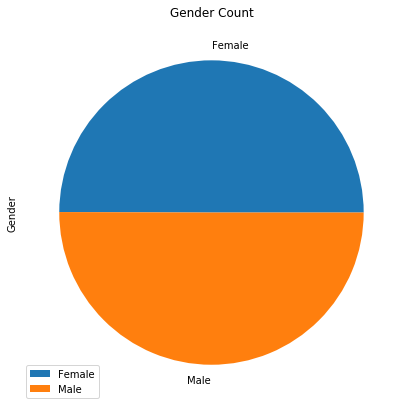

In [58]:
counts = df['Gender'].value_counts().sort_index()
print(counts)
# Plot a pie chart
counts.plot(kind='pie', title='Gender Count',figsize=(8,7))
plt.legend()
plt.show()

<h2>What is the total number of suicide cases by Gender per year (2001-2012)?</h2>

<h4>Value Counts:</h4>

In [59]:
gender_data = df.groupby(['Year','Gender'])['Total'].sum()
gender_data = gender_data.reset_index()
gender_data

,Year,Gender,Total
0,2001,Female,379645
1,2001,Male,596819
2,2002,Female,369675
3,2002,Male,623973
4,2003,Female,365657
5,2003,Male,631965
6,2004,Female,369297
7,2004,Male,653840
8,2005,Female,368980
9,2005,Male,656221


<h4>Graphical Representation:</h4>

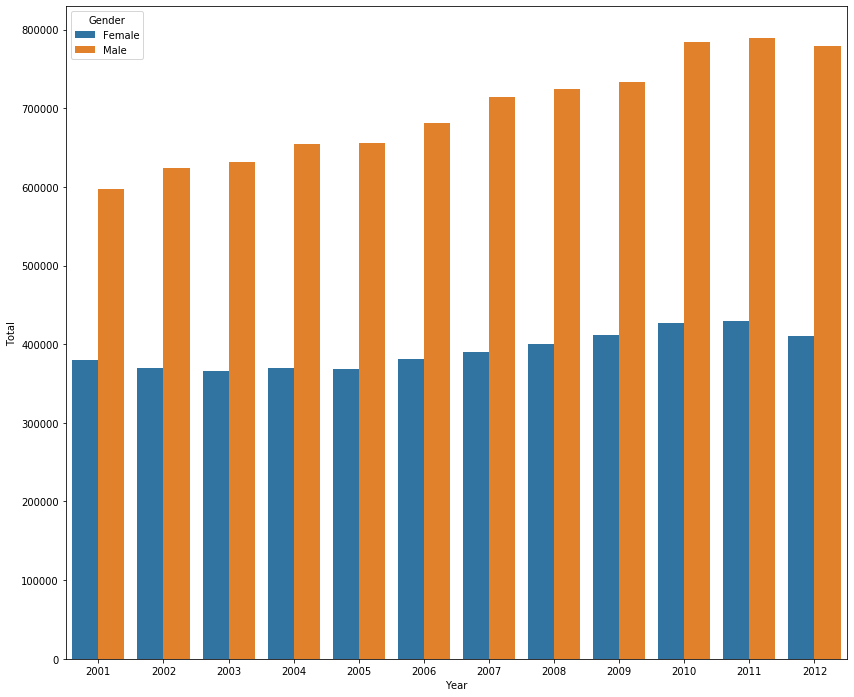

In [60]:
plt.figure(figsize=(14,12))
sns.barplot(x=gender_data['Year'], y=gender_data['Total'], hue=gender_data['Gender'])

<h2>Which age group has the highest suicide rate?</h2>

Text(0, 0.5, 'Different Age groups')

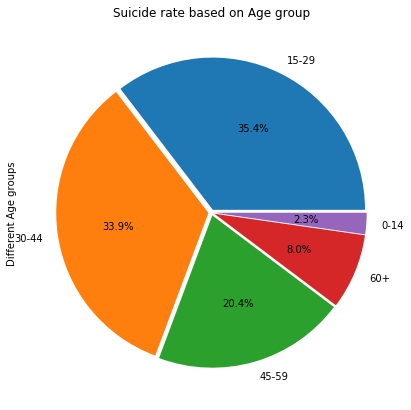

In [63]:
df_Age = df[df["Age_group"] != "0-100+"]
df_nonzero = df_Age[df_Age["Total"] != 0]
df_Age.groupby("Age_group")["Total"].sum().sort_values(ascending = False).plot(kind = "pie", explode = [0.02,0.02,0.02,0.02,0.02],
                                                                              autopct = "%3.1f%%", figsize = (15,7), shadow = False)
plt.title("Suicide rate based on Age group")
plt.ylabel("Different Age groups")

<h4>From the Analysis, 35.4% of the total suicide cases are from the age group 15-29.</h4>

<h2>Causes of suicides in India</h2>
<h3>What are the top causes which lead to suicides in India?</h3>

In [64]:
reasons = causes_df.groupby('Type')['Total'].sum().sort_values(ascending=False)
reasons

Type
Family Problems                                   341952
Causes Not known                                  237069
Other Causes (Please Specity)                     216050
Other Prolonged Illness                           194565
Insanity/Mental Illness                            94229
Love Affairs                                       45039
Bankruptcy or Sudden change in Economic            32755
Poverty                                            32684
Dowry Dispute                                      31970
Drug Abuse/Addiction                               30046
Unemployment                                       27365
Failure in Examination                             27005
Property Dispute                                   18652
Suspected/Illicit Relation                         14911
Fall in Social Reputation                          13464
Professional/Career Problem                        12554
Cancellation/Non-Settlement of Marriage            11296
Death of Dear Person      

<h3>Graphical representation of the causes of suicides in India.</h3>

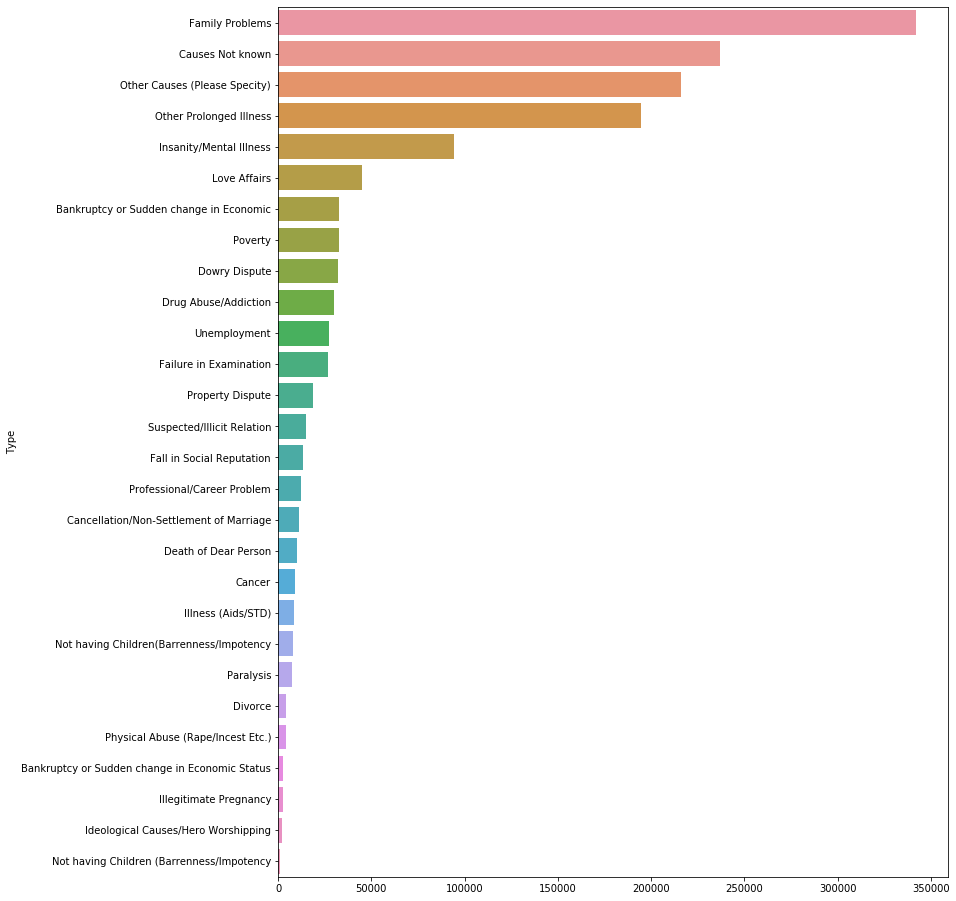

In [61]:
reasons = causes_df.groupby('Type')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(12,16))
sns.barplot(y=reasons.index, x= reasons.values)

<h4>Family problems are seen as the major cause for suicides in India.</h4> 

<h2> Suicide cases by Social Status</h2>

In [67]:
filt = df["Type_code"] == 'Social_Status'
result = df.loc[filt].groupby('Type')['Total'].sum().sort_values(ascending = False)
result

Type
Married            3065322
Never Married       954903
Widowed/Widower     186339
Seperated           115413
Divorcee             45816
Name: Total, dtype: int64

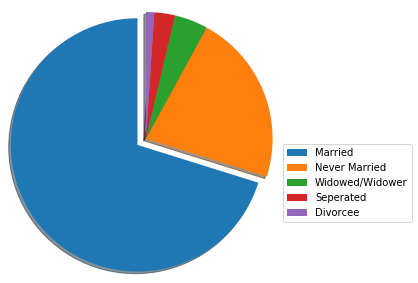

In [68]:
explode = [0.1,0,0,0,0]
plt.pie(result.values, explode = explode, shadow= True, startangle = 90,radius=1.2)
plt.tight_layout()
plt.legend(result.index, loc = 2, bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

<h4>Maximum sucide cases were among married people</h4>

<h2> Suicide cases by Education Status</h2>

In [108]:
filt = df["Type_code"] == 'Education_Status'
result = df.loc[filt].groupby('Type')['Total'].sum().sort_values()
result

Type
Post Graduate and Above                       22425
Diploma                                       42459
Graduate                                      93822
Hr. Secondary/Intermediate/Pre-Universit     356724
Matriculate/Secondary                        769698
No Education                                 965271
Middle                                      1028913
Primary                                     1088481
Name: Total, dtype: int64

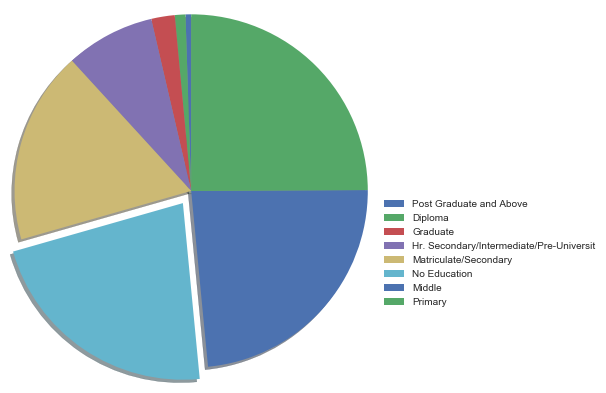

In [109]:
explode = [0,0,0,0,0,0.1,0,0]
plt.pie(result.values, explode = explode, shadow= True, startangle = 90,radius=1.2)
plt.tight_layout()
plt.legend(result.index, loc = 2, bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

<h4>This stat came out to be very interesting:<br>
People with no education have lower rates of suicide than people with education.</h4>

<h2> Suicide cases by Professional Profile</h2>

In [107]:
filt = df["Type_code"] == 'Professional_Profile'
result = df.loc[filt].groupby('Type')['Total'].sum().sort_values()
result1=result.drop(index='Others (Please Specify)')
result1

Type
Retired Person                        11334
Service (Government)                  23325
Public Sector Undertaking             30786
Professional Activity                 39204
Student                               74323
Self-employed (Business activity)     78112
Unemployed                           114374
Service (Private)                    115472
Farming/Agriculture Activity         197923
House Wife                           285243
Name: Total, dtype: int64

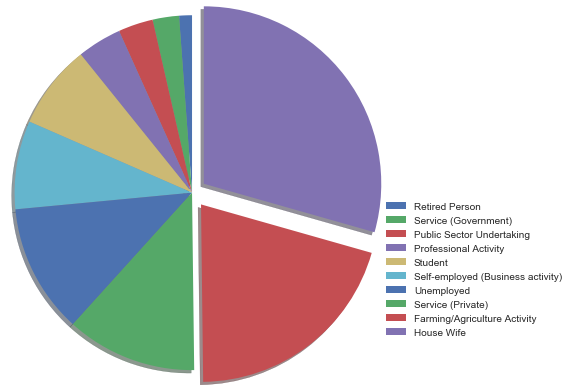

In [105]:
explode = [0,0,0,0,0,0,0,0,0.1,0.1]
plt.pie(result1.values, explode = explode, shadow= True, startangle = 90,radius=1.2)
plt.tight_layout()
plt.legend(result1.index, loc = 2, bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

<h4>Suicide rates among farmers and housewives is much higher than any other profession.</h4>

<h2>Means Adopted for suicide</h2>

In [112]:
filt = df["Type_code"] == 'Means_adopted'
result = df.loc[filt].groupby('Type')['Total'].sum().sort_values()
result

Type
By Machine                                   1661
By Self Infliction of injury                 5093
By Fire-Arms                                 6294
By Jumping from (Building)                   7871
By Jumping off Moving Vehicles/Trains        8116
By Jumping from (Other sites)                8127
By Other means                               9238
By Overdose of sleeping pills                9960
By touching electric wires                  10816
By Over Alcoholism                          15973
By coming under running vehicles/trains     45299
By Drowning                                 96711
By Fire/Self Immolation                    128006
By Other means (please specify)            135132
By Consuming Other Poison                  231178
By Consuming Insecticides                  275501
By Hanging                                 460955
Name: Total, dtype: int64

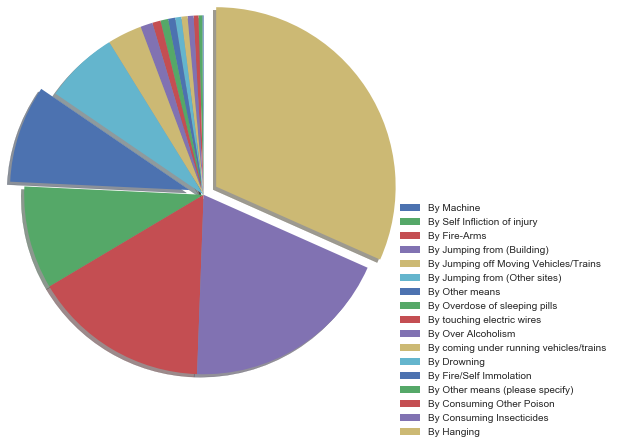

In [115]:
explode = [0,0,0,0,0,0,0,0,0,0,0,0,0.1,0,0,0,0.1]
plt.pie(result.values, explode = explode, shadow= True, startangle = 90,radius=1.2)
plt.tight_layout()
plt.legend(result.index, loc = 2, bbox_to_anchor=(1, 0., 0.5, 0.5))
plt.show()

<h4>Hanging is the most used mean for suicides in India.<br> Self Immolation can be seen as the next growing mean for suicides in India</h4>

<h3>The main objective of this project was to focus and analyze the growing rates of suicide cases in India and look into the major causes that lead to them.</h3>   

   <h1>THANK YOU!</h1>